In [ ]:
!pip install librosa

In [ ]:
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Install imageio for creating animations.  
!pip -q install imageio
!pip -q install scikit-image
!pip install git+https://github.com/tensorflow/docs

In [ ]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

### Testing

In [ ]:
audio_data = '/content/glaive - dnd (audio).mp3'
ipd.Audio(audio_data)

In [ ]:
?librosa.*

In [ ]:
plt.figure(figsize=(14, 5))
data, sr = librosa.load(audio_data, sr=96000)
# librosa.display.waveplot(x, sr=sr)
data.shape

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(13198594,)

<Figure size 1008x360 with 0 Axes>

In [ ]:
type(data)

numpy.ndarray

In [ ]:
13198594 // 96000 + 1


138

In [ ]:
data.reshape((96000, 137))

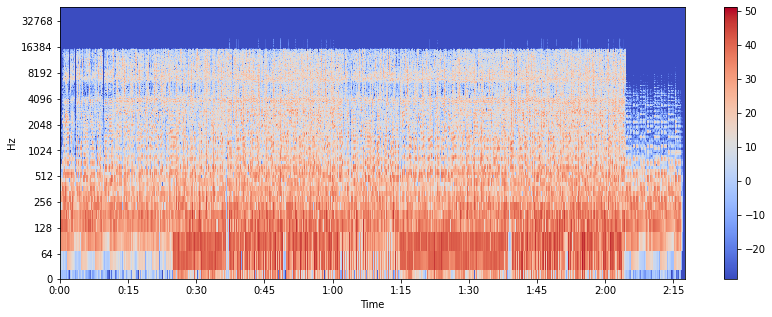

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

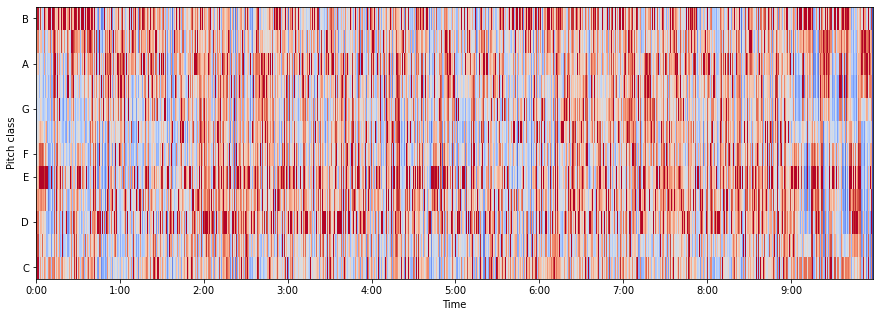

In [ ]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=44100, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

### Current

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
import math
from time import time
import numpy as np
from sklearn.decomposition import PCA
import librosa

mp3_version = AudioSegment.from_file('/content/glaive - dnd (audio).mp3', "mp3")

In [ ]:
aud_seg = mp3_version
LATENT_DIM = 512

def flattened_pca(mp3_filename):
  '''
    loads mp3 file, gets magnitude mel spectrogram, flattens mel and reduces dimensionality of particular mel.
    Returns flattened magnitude mel spectrogram.
  '''
  y, sr = librosa.load(mp3_filename)
  mel = librosa.feature.melspectrogram(y=y, sr=sr)
  mel_db = librosa.power_to_db(mel, ref=np.max)
  mel_db = mel_db.flatten()
  mel_db = np.reshape(mel_db, (1, -1))

  return mel_db

def split_save(aud_seg, denom=5000, filename='song'):
  """Takes a pydub AudioSegment and divides it into n songs
     with denom length in milliseconds. 
     Returns cuts of songs.
  """
  cuts = math.ceil(math.ceil(len(aud_seg) / 1000) * 1000 / denom) 

  num = 0
  front = 0
  back = denom
  song = aud_seg[front:back]

  for i in range(cuts-1):
    # Should be changed when turned into a script
    mp3_filename = f'/content/{filename}_{num}.mp3'
    song.export(mp3_filename, format='mp3')

    # flattened pca
    # every two iterations, iterpolate between


    front += denom
    back += denom
    num += 1
    song = aud_seg[front:back]

  # takes care of last cut even if it is not 5000 milliseconds
  num += 1
  song = aud_seg[back:]
  song.export(f'/content/{filename}_{num}.mp3', format='mp3')


split_save(aud_seg)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

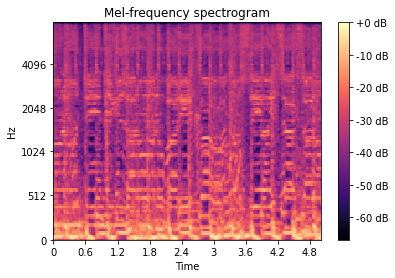

In [ ]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(mel, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

### ProGAN Trials

In [ ]:
# Install imageio for creating animations.  
!pip -q install imageio
!pip -q install scikit-image
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-gnf1tapa
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-gnf1tapa
     |████████████████████████████████| 1.0MB 4.4MB/s 
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0a8a2778e805509eb0ec0c2487732a9085db33900_-cp36-none-any.whl size=146834 sha256=3fd8a6a84ab4fc62f47b924e43074d3b5738e1ef5a78769afed7672949d22a24
  Stored in directory: /tmp/pip-ephem-wheel-cache-i394cnmv/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [ ]:
#@title Imports and function definitions

from absl import logging

import imageio
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Sequential
tf.random.set_seed(0)

import tensorflow_hub as hub
import time

from IPython import display
from skimage import transform

In [ ]:
progan = hub.load("https://tfhub.dev/google/progan-128/1").signatures['default']

In [ ]:
def flattened_pca(mp3_filename):
  '''
    loads mp3 file, gets magnitude mel spectrogram, flattens mel and reduces dimensionality of particular mel
  '''
  y, sr = librosa.load(mp3_filename)
  mel = librosa.feature.melspectrogram(y=y, sr=sr)
  mel_db = librosa.power_to_db(mel, ref=np.max)
  mel_db = mel_db.flatten()
  mel_db = np.reshape(mel_db, (1, -1))

  return mel_db
vector_1 = flattened_pca(sample_song1)
vector_2 = flattened_pca(sample_song2)

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


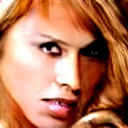

In [ ]:
import PIL

# Simple way to display an image.
def display_image(image):
  image = tf.constant(image)
  image = tf.image.convert_image_dtype(image, tf.uint8)
  return PIL.Image.fromarray(image.numpy())

display_image(image[0])

In [ ]:
# FOR ANIMATING THE INTERPOLATIONS

In [ ]:
# HELPER FUNCTIONS

In [ ]:
# Interpolates between two vectors that are non-zero and don't both lie on a
# line going through origin. First normalizes v2 to have the same norm as v1. 
# Then interpolates between the two vectors on the hypersphere.
def interpolate_hypersphere(v1, v2, num_steps):
  v1_norm = tf.norm(v1)
  v2_norm = tf.norm(v2)
  v2_normalized = v2 * (v1_norm / v2_norm)

  vectors = []
  for step in range(num_steps):
    interpolated = v1 + (v2_normalized - v1) * step / (num_steps - 1)
    interpolated_norm = tf.norm(interpolated)
    interpolated_normalized = interpolated * (v1_norm / interpolated_norm)
    vectors.append(interpolated_normalized)
  return tf.stack(vectors)


# Given a set of images, show an animation.
def animate(images):
  images = np.array(images)
  converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images)
  return embed.embed_file('./animation.gif')

In [ ]:
#ACTUAL THING I NEED TO RUN

In [ ]:
from tensorflow_docs.vis import embed

In [ ]:
#@MODEL
gan_layer = hub.KerasLayer('https://tfhub.dev/google/progan-128/1', trainable=False)

def create_model():
  model = Sequential()
  model.add(Dense(512, activation='relu'))
  model.add(gan_layer)
  return model

model = create_model()

Time: 3.633678709999913 seconds



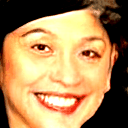

In [ ]:
import time

def interpolate_between_vectors(v1, v2, steps=10):
  '''
    Pass two matrices or vectors. This then gets interpolated and consequently animated.
    Returns interpolated images with shape ()
  '''
  # v1 = tf.random.normal([latent_dim])
  # v2 = tf.random.normal([latent_dim])
  # v1 = tf.random.normal()
    
  # Creates a tensor with 25 steps of interpolation between v1 and v2.
  vectors = interpolate_hypersphere(v1, v2, steps)

  # Uses module to generate images from the latent space.
  interpolated_images = model(vectors)

  return interpolated_images

tok = time.perf_counter()
interpolated_images = interpolate_between_vectors(vector_1, vector_2)
tik = time.perf_counter()
print(f'Time: {tik - tok} seconds')
animate(interpolated_images)



## Final

In [ ]:
!pip install moviepy
!pip install imageio-ffmpeg==0.2.0

     |████████████████████████████████| 22.2MB 2.2MB/s 


In [ ]:
!pip install soundfile

In [ ]:

from absl import logging
import soundfile
import imageio
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow_docs.vis import embed
from PIL import Image
import moviepy.editor as mpy

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2555904/45929032 bytes (5.6%)6078464/45929032 bytes (13.2%)9822208/45929032 bytes (21.4%)13377536/45929032 bytes (29.1%)16859136/45929032 bytes (36.7%)20439040/45929032 bytes (44.5%)24010752/45929032 bytes (52.3%)27443200/45929032 bytes (59.8%)30916608/45929032 bytes (67.3%)34127872/45929032 bytes (74.3%)37732352/45929032 bytes (82.2%)41418752/45929032 bytes (90.2%)

In [ ]:


import librosa
from scipy.stats import truncnorm
import numpy as np
import time
import tensorflow as tf

mp3_filename  = '/content/Talking Heads - This Must Be The Place (Naive Melody) Extended Mix (1).mp3'
speed_fpm = 12
TRUNCATION = 1
INPUT_SHAPE = 512
BATCH_SIZE = 1
FPS = 43

def get_song(song_name):
  '''
    Returns the librosa audio file and the sample rate
  '''
  y, sr = librosa.load(song_name)
  return (y, sr)

def get_num_noise(wav, sr):
  '''
    Returns number of initial vectors to produce
  '''
  num_init_noise = round(
          librosa.get_duration(wav, 
                                sr)/60*speed_fpm)
  
  # num_init_noise = round(
  #         librosa.get_duration(wav, 
  #                                sr))


  return num_init_noise


def get_init_noise(num_noise):
  '''
    Returns num_noise list of noise vectors from truncated normal distribution
  '''
  init_noise = [TRUNCATION * \
                      truncnorm.rvs(-2, 2, 
                                    size=(BATCH_SIZE, INPUT_SHAPE)) \
                              .astype(np.float32)[0]\
                      for i in range(num_noise)]
  return init_noise





def get_spec_norm(wav, sr, n_mels, hop_length):
  '''Obtain maximum value for each time-frame in Mel Spectrogram, 
     and normalize between 0 and 1'''

  # Generate Mel Spectrogram
  spec_raw= librosa.feature.melspectrogram(y=wav, sr=sr,
                                           n_mels=n_mels,
                                           hop_length=hop_length)
  
  # Obtain maximum value per time-frame
  spec_max = np.amax(spec_raw,axis=0)

  # Normalize all values between 0 and 1
  spec_norm = (spec_max - np.min(spec_max))/np.ptp(spec_max)

  return spec_norm

def interpolate_hypersphere(v1, v2, num_steps):
  v1_norm = tf.norm(v1)
  v2_norm = tf.norm(v2)
  v2_normalized = v2 * (v1_norm / v2_norm)

  vectors = []
  for step in range(num_steps):
    interpolated = v1 + (v2_normalized - v1) * step / (num_steps - 1)
    interpolated_norm = tf.norm(interpolated)
    interpolated_normalized = interpolated * (v1_norm / interpolated_norm)
    vectors.append(interpolated_normalized)

  return tf.stack(vectors)

def interpolate_all(vector_list, num_steps):

  '''
    interpolates all vectors in vector list
  '''
  frames = [interpolate_hypersphere(vector_list[i], \
          vector_list[i+1], num_steps) for i in range(len(vector_list)-1)]

  return frames


def get_frames():

  '''
    Get all the noise frames for the whole song
  '''
  y, sr = get_song(mp3_filename)


  frame_duration = int(sr/FPS - (sr/FPS % 64))
  print(f"frame duration is {frame_duration}")

  spec_norm = get_spec_norm(y, sr, INPUT_SHAPE, frame_duration)
  print(f"Size of spec norm is : {spec_norm.shape}")
  print(f"Type of spec norm is : {type(spec_norm)}")



  num_noise = get_num_noise(y, sr)
  init_noise = get_init_noise(num_noise)
  print(f"the length of init_noise is {len(init_noise)}")


  steps = int(np.floor(len(spec_norm))/len(init_noise)- 1)
  
  print(f"we have {steps} steps")

  t0 = time.perf_counter()
  frames = interpolate_all(init_noise, steps)
  t1 = time.perf_counter()
  print(f"It took {t1-t0} seconds to interpolate")

  return frames


In [ ]:
import tensorflow_hub as hub

progan = hub.load("https://tfhub.dev/google/progan-128/1").signatures['default']

In [ ]:
from tqdm import tqdm

In [ ]:
import os
os.mkdir('/content/images')

In [ ]:
frames = get_frames()

t0 = time.perf_counter()
foile = 0
for noises in tqdm(frames):
  i = 0
  for noise in noises:
    image = progan(noise)['default']
    # print(image.numpy().reshape((128,128,3)).shape)

    image = image.numpy().reshape((128,128,3))
    saved_image = Image.fromarray((image * 255).astype(np.uint8))

    file_name = str(foile)
    saved_image.save(os.path.join('/content/images/',file_name+'.png'))
    i += 1
    foile += 1
t1 = time.perf_counter()

print(type(image))
print(i)
print(f"It took {t1-t0} seconds to populate images directory ")

  warnings.warn("PySoundFile failed. Trying audioread instead.")



frame duration is 512
Size of spec norm is : (16608,)
Type of spec norm is : <class 'numpy.ndarray'>
the length of init_noise is 77
we have 214 steps


  0%|          | 0/76 [00:00<?, ?it/s]

It took 17.99928779799984 seconds to interpolate


100%|██████████| 76/76 [14:40<00:00, 11.58s/it]

<class 'numpy.ndarray'>
214
It took 880.1066573799999 seconds to populate images directory 


In [ ]:
image_list = os.listdir('/content/images')

image_list = sorted(image_list,key=lambda x: int(os.path.splitext(x)[0]))

In [32]:
y, sr = get_song(mp3_filename)
fps = FPS
file_name_1 = 'damovie.mp4'



image_list = os.listdir('/content/images')

image_list = sorted(image_list,key=lambda x: int(os.path.splitext(x)[0]))


image_list_1 = []
for image in image_list:
  image_list_1.append('/content/images/' + image)

# Calculate frame duration (i.e. samples per frame)
frame_duration = int(sr/fps - (sr/fps % 64))


# Write temporary audio file
soundfile.write('tmp.wav',y, sr)

# Generate final video
audio = mpy.AudioFileClip('tmp.wav', fps = sr*2)
video = mpy.ImageSequenceClip(image_list_1, 
                                  fps=sr/frame_duration)


# video = mpy.ImageSequenceClip(image_list_1, 
#                                   fps=sr/frame_duration)


video = video.set_audio(audio)
# video.write_videofile(file_name,audio_codec='aac')
video.write_videofile(file_name_1)

#  Delete temporary audio file
os.remove('tmp.wav')

  warnings.warn("PySoundFile failed. Trying audioread instead.")



[MoviePy] >>>> Building video damovie.mp4
[MoviePy] Writing audio in damovieTEMP_MPY_wvf_snd.mp3


100%|██████████| 8503/8503 [00:07<00:00, 1091.27it/s]


[MoviePy] Done.
[MoviePy] Writing video damovie.mp4


100%|██████████| 16265/16265 [01:22<00:00, 196.34it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: damovie.mp4 



In [34]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [36]:
!cp damovie.mp4 "/content/gdrive/My Drive/"

In [ ]:
print(sr/frame_duration)

43.06640625


In [ ]:
# Given a set of images, show an animation.
def animate(images):
  images = np.array(images)
  converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images)
  return embed.embed_file('./animation.gif')

In [ ]:
animate(images['default'])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
t0 = time.perf_counter()
images = progan(frames[0])
t1 = time.perf_counter()
print(images['default'].shape)
print(f"{t1-t0} seconds")

(214, 128, 128, 3)
47.58348900899995 seconds


In [ ]:

for j, image in enumerate(frames):   

          array = np.array(image)

          # Apply efects
          for effect in self.custom_effects:
            array = effect.apply_effect(array = array, 
                                        index = (i*batch_size)+j)
            
          final_image = Image.fromarray(array)

          # If resolution is provided, resize
          if resolution:
            final_image = final_image.resize((resolution, resolution))


          # Save. Include leading zeros in file name to keep alphabetical order
          max_frame_index = num_frame_batches * batch_size + batch_size
          file_name = str((i*batch_size)+j)\
                     .zfill(len(str(max_frame_index)))
          final_image.save(os.path.join(self.frames_dir,file_name+'.png'))